### Importaciones

Importación de librerías

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from src.cleaning_functions import *

Importación de los datos

In [2]:
train_raw=pd.read_csv('./Data/train.csv')

### Exploración de datos

Primera visualización de los datos en crudo

In [3]:
train_raw.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,https://www.airbnb.com/rooms/2842228,20211205213126,2021-12-06,Your little appartment on wheels,A waggon luxurous designed as a hotel room on ...,"Waterland is a beautiful countryside area, wit...",https://a0.muscache.com/pictures/cc2aa51a-3c11...,3040748,https://www.airbnb.com/users/show/3040748,...,4.75,4.69,4.49,0363 2A6D 7C09 877D 715F,f,10,0,10,0,0.91
1,1,https://www.airbnb.com/rooms/41236669,20211205213126,2021-12-06,Spacious 4p city center apartment (2 bedrooms!),Are you looking for a perfect place to stay in...,Our home is located in the Plantagebuurt. A un...,https://a0.muscache.com/pictures/5f33bf5a-399c...,34773624,https://www.airbnb.com/users/show/34773624,...,5.00,5.00,4.89,0363 BD0E 9934 ACCA D3DE,f,1,1,0,0,0.40
2,2,https://www.airbnb.com/rooms/27240740,20211205213126,2021-12-06,SWEETS hotel Theophile de Bockbrug,Comfortable bridge house on the doorstep of Am...,"The neighbourhood has a quiet, village-like fe...",https://a0.muscache.com/pictures/b1145dd1-e485...,203731852,https://www.airbnb.com/users/show/203731852,...,4.87,4.87,4.40,Exempt,t,20,4,0,0,1.25
3,3,https://www.airbnb.com/rooms/33326302,20211205213126,2021-12-05,Lovely home near Vondelpark: great for couples!,"In het gezellige Amsterdamse Oud-West, vind je...",Oud-West is een van de gezelligste wijken in A...,https://a0.muscache.com/pictures/75f8ae17-eeb8...,68783888,https://www.airbnb.com/users/show/68783888,...,5.00,4.90,4.70,0363 7E52 3D3D 6AB1 3C72,f,1,1,0,0,0.31
4,4,https://www.airbnb.com/rooms/969862,20211205213126,2021-12-06,Living in a houseboat on the water,<b>The space</b><br />The apartment is a part ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,5297940,https://www.airbnb.com/users/show/5297940,...,4.89,4.49,4.57,0363 77F9 4DBC 2E88 41C2,f,1,0,1,0,1.78


In [4]:
train_raw.info(verbose=False,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Columns: 74 entries, id to reviews_per_month
dtypes: float64(22), int64(19), object(33)
memory usage: 19.8 MB


In [5]:
train_raw.describe().T

,count,mean,std,min,25%,50%,75%,max
id,4167.0,2.083000e+03,1.203054e+03,0.000000e+00,1.041500e+03,2.083000e+03,3.124500e+03,4.166000e+03
scrape_id,4167.0,2.021121e+13,3.906719e-03,2.021121e+13,2.021121e+13,2.021121e+13,2.021121e+13,2.021121e+13
host_id,4167.0,8.968890e+07,1.158584e+08,3.159000e+03,9.002030e+06,3.133220e+07,1.354875e+08,4.346341e+08
host_listings_count,4167.0,2.488601e+00,1.450804e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.180000e+02
host_total_listings_count,4167.0,2.488601e+00,1.450804e+01,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,7.180000e+02
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,4167.0,5.236691e+01,1.683493e-02,5.229103e+01,5.235666e+01,5.236659e+01,5.237655e+01,5.242476e+01
longitude,4167.0,4.891435e+00,3.617564e-02,4.753510e+00,4.869430e+00,4.888790e+00,4.908985e+00,5.026430e+00
accommodates,4167.0,2.941205e+00,1.464789e+00,0.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


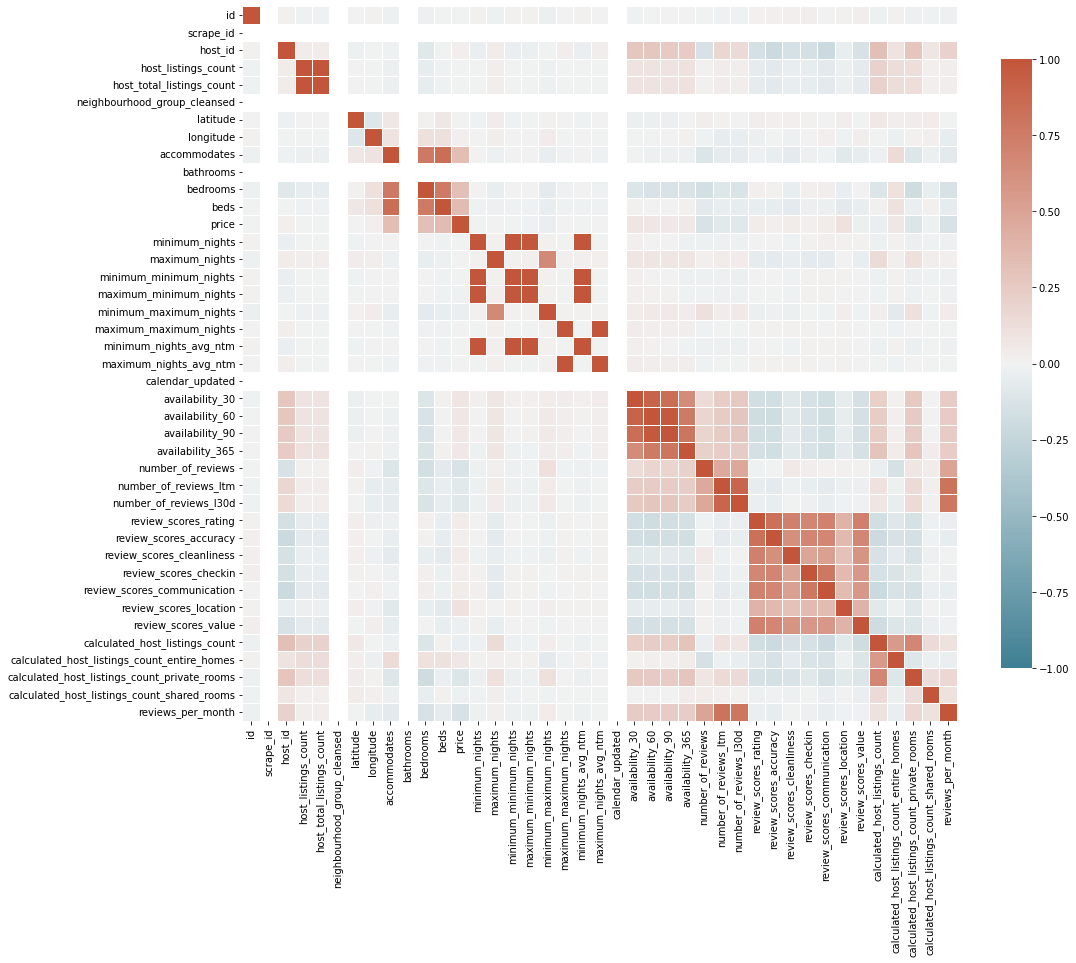

In [6]:
plt.figure(figsize=(16,16)) 

color_map = sns.diverging_palette(220, 20, as_cmap=True) # Paleta de colores

sns.heatmap(train_raw.corr(),  
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            vmin=-1,
            annot=False,
            cbar_kws={"shrink": .7
                     },# barra lateral
);

### Limpieza del dataframe

Hay una gran cantidad de columnas innecesarias, se va ha hacer una limpieza eliminando las columnas sobrantes

In [7]:
train=train_raw.drop(columns=drop_columns)

Después de la eliminación de columnas se van a tratar las columnas restantes

Lo primero que se va a hacer es convertir a numéricas "host_response_rate" y "host_response_time"


In [8]:
train.host_response_rate=train.host_response_rate.apply(cleaning_host_response_rate)
train.host_response_time=train.host_response_time.apply(cleaning_host_response_time)

Ahora se van a modificar aquellas columnas de verdadero o falso

In [9]:
columnas_v_f=[]
for e in list(train.keys()):
    if len(train[e].unique())==2:
        columnas_v_f.append(e)
        
for e in columnas_v_f:
    train[e]=train[e].apply(cleaning_v_f)

Ahora se va limpiar la columna bathrooms_text

In [10]:
train.bathrooms_text=train.bathrooms_text.apply(cleaning_bathrooms_text)

Ahora la columna amenities se va a cambiar por el número de amenities que haya

In [11]:
train["amenities_n"]=train.amenities.apply(cleaning_amenities_n)

Con la columna amenities se va a hacer un get dummies por aquellos elementos que estén presentes al menos en un 20% de las propiedades y como máximo en un 80% para evitar generar una cantidad ingente de columnas con todos los valores iguales

In [12]:
train.amenities = train.amenities.apply(cleaning_amenities)

train = amenities_total(train)

Para la columna 'host_verifications' se va hacer una especie de get dummies de forma manual, añadiedo solo las columnas de si el host tiene email verificado o si tiene el teléfono verificado

In [13]:
train["host_verification_email"]=train.host_verifications.str.contains('email').astype(int)
train["host_verification_phone"]=train.host_verifications.str.contains('phone').astype(int)
train.drop(columns='host_verifications', inplace=True)

Ahora a las columnas "neighbourhood_cleansed", "room_type" y "amenities" se les va a hacer un get dummies

In [14]:
for e in columns_dummies:
    dummies=pd.get_dummies(train[e])

    train=pd.concat([train, dummies], axis=1)

    train.drop(columns=e, inplace=True)

### Por último se van a rellenar los nulos

In [15]:
train.isna().sum().sort_values(ascending=False)[:5]

host_response_time           1413
host_response_rate           1413
review_scores_cleanliness     385
bathrooms_text                  8
Private room                    0
dtype: int64

In [16]:
train.bathrooms_text.fillna(value=1, inplace=True)
train.review_scores_cleanliness.fillna(value=train.review_scores_cleanliness.mean(), inplace=True)
train.host_response_rate.fillna(value=0, inplace=True)
train.host_response_time.fillna(value=0, inplace=True)

Ahora se van a downcastear todos los datos para mejorar la performance

In [17]:
train.info(verbose=False, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Columns: 74 entries, host_response_time to Shared room
dtypes: float64(7), int64(10), uint8(57)
memory usage: 785.5 KB


In [18]:
train = donwcast_df(train)
train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 74 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   host_response_time                      4167 non-null   float32
 1   host_response_rate                      4167 non-null   float32
 2   host_is_superhost                       4167 non-null   int8   
 3   host_has_profile_pic                    4167 non-null   int8   
 4   host_identity_verified                  4167 non-null   int8   
 5   latitude                                4167 non-null   float32
 6   longitude                               4167 non-null   float32
 7   accommodates                            4167 non-null   int8   
 8   bathrooms_text                          4167 non-null   float32
 9   price                                   4167 non-null   float32
 10  minimum_nights                          4167 non-null   int1

### Ahora se va a aplicar la función del archivo de funciones que recoge todos los cambios

In [19]:
test=pd.read_csv('./Data/test.csv')
test_clean=clean_total(test)
test_clean.to_csv('./Data/test_clean.csv',index=False)

In [20]:
train=pd.read_csv('./Data/train.csv')
train_clean=clean_total(train)
train_clean.to_csv('./Data/train_clean.csv', index=False)